In [2]:
import pandas as pd

In [6]:
automobile_data = pd.read_csv('datasets/Automobile_data.csv',engine='python')

In [8]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [9]:
import numpy as np

In [11]:
#replace missing data (marked with ?) with numpy NaN 
automobile_data = automobile_data.replace('?', np.nan)
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [12]:
#drop data rows with missing data spotting them using the NaN
automobile_data = automobile_data.dropna()

In [13]:
automobile_data.head()
#data set is clean

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [15]:
#not all columns in our data are relevant that s why we need to take only the relevants from them
col = ['make','fuel-type','body-style','horsepower'] 
automobile_features = automobile_data[col]
automobile_features.head()
#this is our X
#in the real world normally we use an exploratary analysis to check which features are most relevatnt for the price

,make,fuel-type,body-style,horsepower
3,audi,gas,sedan,102
4,audi,gas,sedan,115
6,audi,gas,sedan,110
8,audi,gas,sedan,140
10,bmw,gas,sedan,101


In [16]:
automobile_target = automobile_data[['price']]
automobile_target.head()
#this is our Y

,price
3,13950
4,17450
6,17710
8,23875
10,16430


In [17]:
automobile_features['horsepower'].describe()

count     159
unique     48
top        68
freq       18
Name: horsepower, dtype: object

In [18]:
pd.options.mode.chained_assignment = None 
#turn off warning

In [22]:
#convert to numeric
automobile_features['horsepower'] = pd.to_numeric(automobile_features['horsepower'])

In [24]:
automobile_features['horsepower'].describe()

count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

In [27]:
#price is also in string format we need to convert it to float
automobile_target['price'].describe()
automobile_target = automobile_target.astype(float)
automobile_target['price'].describe()

count      159.000000
mean     11445.729560
std       5877.856195
min       5118.000000
25%       7372.000000
50%       9233.000000
75%      14719.500000
max      35056.000000
Name: price, dtype: float64

In [28]:
#the other features are not numerical so we need one hot encoding
automobile_features = pd.get_dummies(automobile_features,
                                     columns= ['make','fuel-type','body-style'])

In [29]:
automobile_features.head()
#now all data is numerical and vectorial for the non numerical values with one Hot encoding

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
3,102,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,115,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,110,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
10,101,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [30]:
automobile_features.columns
#we need to perform some preprocessing each brand is now a column


Index(['horsepower', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon'],
      dtype='object')

In [31]:
from sklearn import preprocessing

In [32]:
#best practice standardise numeric values
#substract the mean and divide by standard deviation
#perfoms better 
automobile_features[['horsepower']] = preprocessing.scale(automobile_features[['horsepower']])
automobile_features[['horsepower']].head()

,horsepower
3,0.201279
4,0.625812
6,0.462530
8,1.442223
10,0.168622


In [42]:
from sklearn.model_selection import train_test_split
#we need to cluster our data into training data and test data
X_train, x_test, Y_train, y_test = train_test_split(automobile_features,
                                                   automobile_target,
                                                   test_size=0.2,
                                                   random_state=0)

In [43]:
#now the real deal building a fully connected neural network using PyTorch
import torch

In [44]:
dtype = torch.float 

In [45]:
X_train_tensor = torch.tensor(X_train.values,dtype = dtype)
x_test_tensor = torch.tensor(x_test.values, dtype= dtype)

Y_train_tensor = torch.tensor(Y_train.values, dtype= dtype)
y_test_tensor = torch.tensor(y_test.values, dtype = dtype)

In [46]:
X_train_tensor.shape

torch.Size([127, 26])

In [47]:
Y_train_tensor.shape

torch.Size([127, 1])

In [50]:
inp = 26
out = 1
#hidden layer will have 100 neurones
hid = 100 

loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001


In [51]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid), #linear layer input layer ip and output is hid
                           torch.nn.Sigmoid(), #activation function S curve 
                           torch.nn.Linear(hid, out),) #input layer input feature hid  and output out

In [52]:
#We run a trainning of 10 000 epochs 
for iter in range (10000):
    y_pred = model(X_train_tensor) # we calculate y_pred from our modul 
    loss = loss_fn(y_pred, Y_train_tensor) # calculate loss function from y_pred and Y_train_tensor
    #foreach 1000 iteration print value of loss to check how it converge
    if iter % 1000 == 0:
        print(iter, loss.item())
        
    #zero all your gradients before you call loss backward
    model.zero_grad()
    loss.backward() #backward propagation to tune in weights
    
    #gradients should be updated within torch.nograd scope
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            

0 168083488.0
1000 4327020.5
2000 2370146.0
3000 1672289.0
4000 1410424.25
5000 1262356.125
6000 1151775.875
7000 1092044.75
8000 1050108.875
9000 1012292.3125


In [54]:
#let s take a sample from our test data and perform prediction with our current model
sample = x_test.iloc[23]
sample

horsepower               -0.353881
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            0.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 0.000000
make_subaru               0.000000
make_toyota               0.000000
make_volkswagen           1.000000
make_volvo                0.000000
fuel-type_diesel          0.000000
fuel-type_gas             1.000000
body-style_convertible    0.000000
body-style_hardtop        0.000000
body-style_hatchback      0.000000
body-style_sedan          1.000000
body-style_wagon          0.000000
Name: 186, dtype: float64

In [55]:
# convert the sample using tensor format
sample_tensor = torch.tensor(sample.values, dtype= dtype)
sample_tensor

tensor([-0.3539,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000])

In [56]:
y_pred = model(sample_tensor)
print('Predicted price of automobile is : ',int(y_pred.item()))
print('Actual automobile price is : ', int(y_test.iloc[23]))

Predicted price of automobile is :  8095
Actual automobile price is :  8495


In [57]:
#a single prediction is not enough 
#we need to run the whole prediction on our entire x_test_tensor dataset
y_pred_tensor = model(x_test_tensor)

In [59]:
y_pred = y_pred_tensor.detach().numpy()

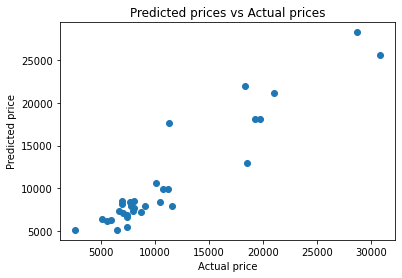

In [63]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title('Predicted prices vs Actual prices')
plt.show()

In [64]:
torch.save(model, 'automobil_data_model')

In [65]:
saved_model = torch.load('automobil_data_model')

In [66]:
y_pred_tensor = saved_model(x_test_tensor)

In [67]:
y_pred = y_pred_tensor.detach().numpy()

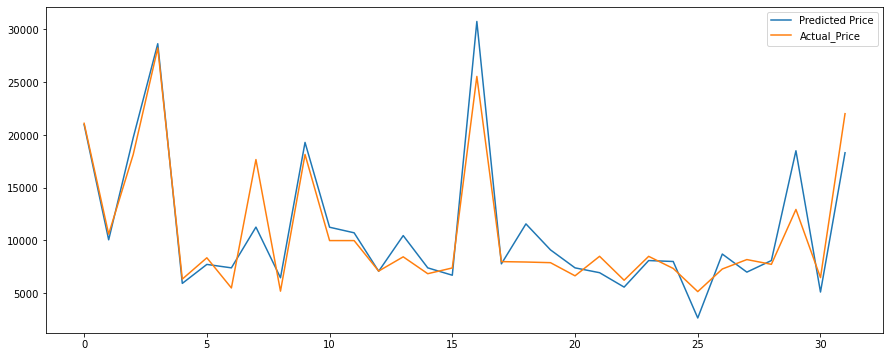

In [69]:
plt.figure(figsize=(15,6))

plt.plot(y_pred,label ='Predicted Price')
plt.plot(y_test.values, label = 'Actual_Price')

plt.legend()
plt.show()